# Import Excel File

In [1]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3
def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_017595ca071f4ab5a153a63db0fc1eca = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='InwSPrdd74f1ZQAVpZCCKor1SCgmWPm3Q6z57-BkbWE0',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_017595ca071f4ab5a153a63db0fc1eca.get_object(Bucket='mymlproject-donotdelete-pr-wljz3f8bj6izgw',Key='Life Expectancy Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


# Import Packages

In [2]:
from pandas.api.types import is_string_dtype
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
import matplotlib.pyplot as plt
from nose.tools import *
from scipy import stats
import seaborn as sns
import pickle


In [3]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

2020-06-18 11:40:02,077 - watson_machine_learning_client.metanames - WARNING - 'AUTHOR_EMAIL' meta prop is deprecated. It will be ignored.


In [4]:
df_data_1.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


# Check for null values

In [5]:
df_data_1.isnull()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Check total number of null values in every column

In [6]:
df_data_1.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

Check all the columns

In [7]:
column_name =df_data_1.columns

In [8]:
column_name

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [9]:
status = pd.get_dummies(df_data_1['Status'])

In [10]:
status

,Developed,Developing
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1
6,0,1
7,0,1
8,0,1
9,0,1


In [11]:
new_df_data_1 = pd.concat([df_data_1,status],axis=1)

In [12]:
new_df_data_1=new_df_data_1.drop(['Status'],axis=1)

In [13]:
new_df_data_1

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developed,Developing
0,Afghanistan,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0,1
1,Afghanistan,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0,1
2,Afghanistan,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0,1
3,Afghanistan,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0,1
4,Afghanistan,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0,1
5,Afghanistan,2010,58.8,279.0,74,0.01,79.679367,66.0,1989,16.7,...,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2,0,1
6,Afghanistan,2009,58.6,281.0,77,0.01,56.762217,63.0,2861,16.2,...,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9,0,1
7,Afghanistan,2008,58.1,287.0,80,0.03,25.873925,64.0,1599,15.7,...,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7,0,1
8,Afghanistan,2007,57.5,295.0,82,0.02,10.910156,63.0,1141,15.2,...,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4,0,1
9,Afghanistan,2006,57.3,295.0,84,0.03,17.171518,64.0,1990,14.7,...,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1,0,1


In [14]:
new_df_data_1.isnull().sum()

Country                              0
Year                                 0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
Developed                            0
Developing                           0
dtype: int64

In [15]:
new_df_data_1.fillna(value=new_df_data_1.mean(),inplace=True)

In [16]:
new_df_data_1.isnull().sum()

Country                            0
Year                               0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
Developed                          0
Developing                         0
dtype: int64

In [17]:
new_df_data_1.columns

Index(['Country', 'Year', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'Developed',
       'Developing'],
      dtype='object')

In [18]:
new_df_data_1=new_df_data_1.groupby("Country").mean()

In [19]:
new_df_data_1

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developed,Developing
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,2007.5,58.193750,269.062500,78.2500,0.014375,34.960110,64.562500,2362.2500,15.51875,107.5625,...,52.31250,0.10000,340.015425,9.972260e+06,16.58125,15.58125,0.415375,8.212500,0,1
Albania,2007.5,75.156250,45.062500,0.6875,4.848750,193.259091,98.000000,53.3750,49.06875,0.9375,...,98.06250,0.10000,2119.726679,6.969116e+05,1.61875,1.70000,0.709875,12.137500,0,1
Algeria,2007.5,73.618750,108.187500,20.3125,0.668929,236.185241,78.735115,1943.8750,48.74375,23.5000,...,91.87500,0.10000,2847.853392,2.164983e+07,6.09375,5.97500,0.694875,12.712500,0,1
Angola,2007.5,49.018750,328.562500,83.7500,5.669554,102.100268,74.911452,3561.3125,18.01875,132.6250,...,47.68750,2.36875,1975.143045,1.014710e+07,6.19375,6.66875,0.458375,8.043750,0,1
Antigua and Barbuda,2007.5,75.056250,127.500000,0.0000,7.740179,1001.585226,97.183779,0.0000,38.42500,0.0000,...,98.31250,0.12500,9759.305728,1.275338e+07,3.42500,3.37500,0.488625,8.843750,0,1
Argentina,2007.5,75.156250,106.000000,10.1250,7.756429,773.038981,81.242558,2.0000,54.98125,11.3750,...,92.37500,0.10000,6998.575103,2.012120e+07,1.07500,0.95000,0.794125,16.506250,0,1
Armenia,2007.5,73.400000,117.375000,1.0000,3.758929,131.007419,87.562500,274.2500,44.70625,1.0000,...,87.37500,0.10000,1999.986318,1.015165e+06,2.03750,2.11250,0.698375,11.787500,0,1
Australia,2007.5,81.812500,63.187500,1.0000,9.808304,5332.226473,92.621279,103.9375,55.86250,1.3750,...,86.87500,0.10000,34637.565047,4.587010e+06,0.66875,0.62500,0.918125,20.037500,1,0
Austria,2007.5,81.481250,65.750000,0.0000,11.758929,4928.439188,81.062500,77.2500,48.28750,0.0000,...,86.75000,0.10000,33827.476309,6.474880e+06,1.73125,1.93750,0.862375,15.387500,1,0


# Graphs

Text(0, 0.5, "['Life Expectancy']")

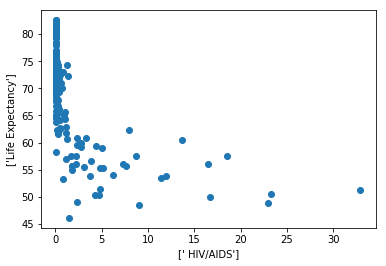

In [20]:
plt.scatter(new_df_data_1[' HIV/AIDS'],new_df_data_1['Life expectancy '])
plt.xlabel([' HIV/AIDS'])
plt.ylabel(['Life Expectancy'])

Text(0, 0.5, "['Life Expectancy']")

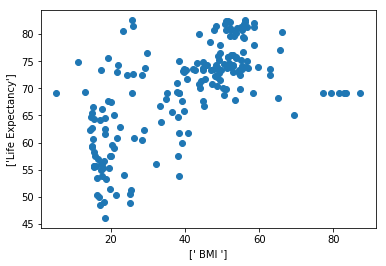

In [21]:
plt.scatter(new_df_data_1[' BMI '],new_df_data_1['Life expectancy '])
plt.xlabel([' BMI '])
plt.ylabel(['Life Expectancy'])

Text(0.5, 0, "['Life Expectancy']")

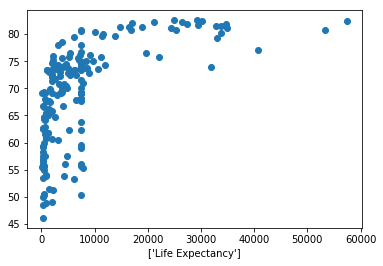

In [22]:
plt.scatter(new_df_data_1['GDP'],new_df_data_1['Life expectancy '])
plt.xlabel(['GDP'])
plt.xlabel(['Life Expectancy'])

Text(0.5, 0, "['Life Expectancy']")

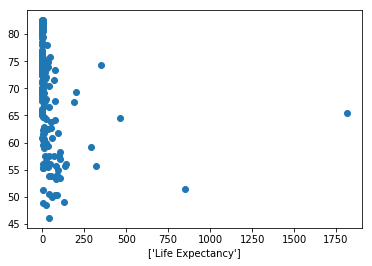

In [23]:
plt.scatter(new_df_data_1['under-five deaths '],new_df_data_1['Life expectancy '])
plt.xlabel(['under-five deaths '])
plt.xlabel(['Life Expectancy'])

Text(0, 0.5, "['Life Expectancy']")

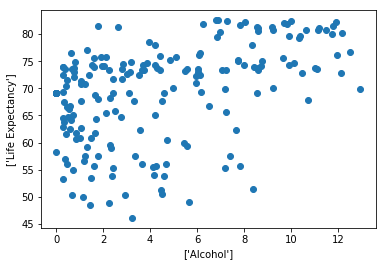

In [24]:
plt.scatter(new_df_data_1['Alcohol'],new_df_data_1['Life expectancy '])
plt.xlabel(['Alcohol'])
plt.ylabel(['Life Expectancy'])

Text(0, 0.5, "['Life Expectancy']")

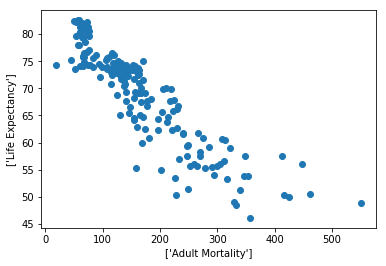

In [25]:
plt.scatter(new_df_data_1['Adult Mortality'],new_df_data_1['Life expectancy '])
plt.xlabel(['Adult Mortality'])
plt.ylabel(['Life Expectancy'])

Text(0, 0.5, "['Life Expectancy']")

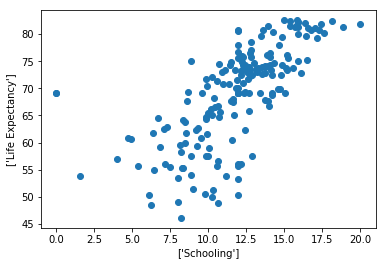

In [26]:
plt.scatter(new_df_data_1['Schooling'],new_df_data_1['Life expectancy '])
plt.xlabel(['Schooling'])
plt.ylabel(['Life Expectancy'])

Text(0.5, 0, "['Life Expectancy']")

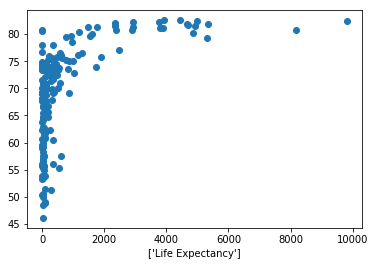

In [27]:
plt.scatter(new_df_data_1['percentage expenditure'],new_df_data_1['Life expectancy '])
plt.xlabel(['percentage expenditure'])
plt.xlabel(['Life Expectancy'])

# SNS HEAT MAP

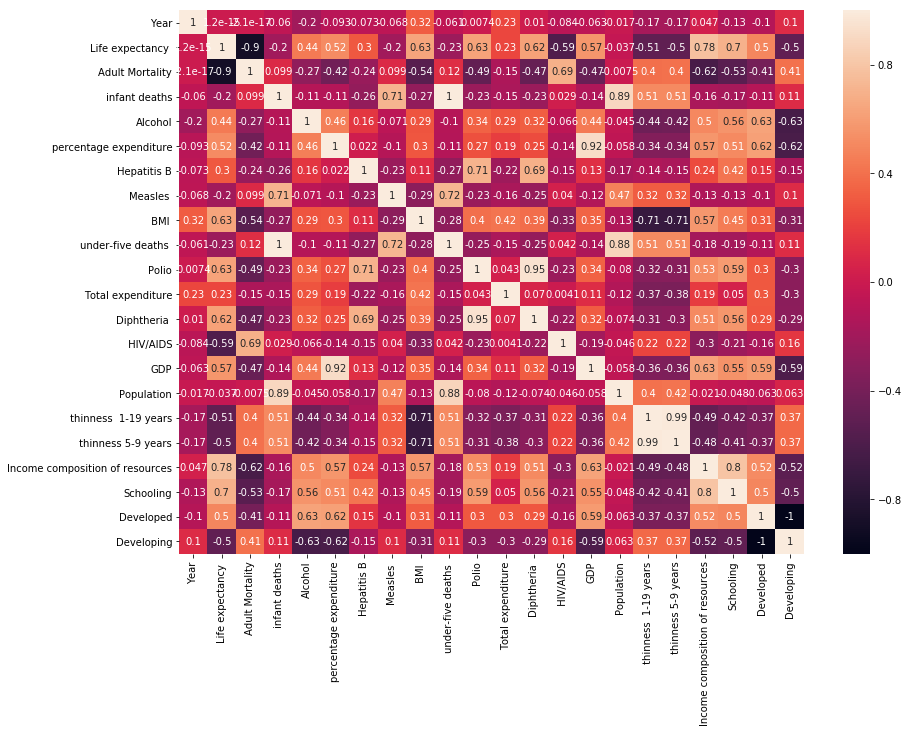

In [28]:
plt.figure(figsize=(14,10))
sns.heatmap(new_df_data_1.corr(),annot=True)

In [29]:
y_label = new_df_data_1['Life expectancy ']
new_df_data_1 = new_df_data_1.drop(['Life expectancy '],axis=1)

In [30]:
min_max_scaler=MinMaxScaler()

In [31]:
new_df_data_1=new_df_data_1.groupby("Country").mean()
# new_df_data_1=min_max_scaler.fit_transform(new_df_data_1)

In [32]:
new_df_data_1=min_max_scaler.fit_transform(new_df_data_1)

In [33]:
new_df_data_1

array([[0.00000000e+00, 4.71121045e-01, 5.72552248e-02, ...,
        4.09856519e-01, 0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 4.95235855e-02, 5.03041112e-04, ...,
        6.05739239e-01, 0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.68333137e-01, 1.48625783e-02, ...,
        6.34435434e-01, 0.00000000e+00, 1.00000000e+00],
       ...,
       [0.00000000e+00, 3.63369015e-01, 2.88105364e-02, ...,
        4.24516532e-01, 0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 6.31572756e-01, 2.44660905e-02, ...,
        5.59575795e-01, 0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 8.34960593e-01, 1.94356793e-02, ...,
        4.90330630e-01, 0.00000000e+00, 1.00000000e+00]])

# Data Split in training, testing

In [34]:
x_train,x_test,y_train,y_test=train_test_split(new_df_data_1,y_label,train_size=0.7,test_size=0.3)

In [35]:
x_train

array([[0.00000000e+00, 1.85389954e-01, 0.00000000e+00, ...,
        8.03493450e-01, 1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 2.74878622e-01, 0.00000000e+00, ...,
        7.53587024e-01, 0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 2.28090813e-01, 2.33228152e-03, ...,
        6.07298815e-01, 0.00000000e+00, 1.00000000e+00],
       ...,
       [0.00000000e+00, 2.41501000e-01, 4.11579092e-04, ...,
        7.54522770e-01, 1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 2.55146453e-01, 4.14322952e-02, ...,
        4.15470992e-01, 0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 2.62674979e-01, 3.33836374e-03, ...,
        4.13599501e-01, 0.00000000e+00, 1.00000000e+00]])

In [36]:
x_train.shape

(135, 21)

In [37]:
x_test.shape

(58, 21)

In [38]:
y_train.shape

(135,)

In [39]:
y_test.shape

(58,)

# Model Training

In [40]:
linear_model= LinearRegression()

In [41]:
linear_model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [42]:
linear_model.score(x_train,y_train)

0.9320628857791255

# prediction

In [43]:
linear_model_predict=linear_model.predict(x_test)

In [44]:
linear_model_predict

array([70.87037736, 71.98702427, 78.86300097, 73.36537276, 71.55483052,
       73.90606087, 71.22114361, 55.03591945, 72.16986366, 80.35022627,
       54.26824123, 54.58375384, 77.43198416, 76.99272297, 73.84349208,
       70.73046487, 68.38282917, 59.88025706, 72.13421734, 81.83594903,
       57.94199593, 72.2974125 , 47.32244578, 66.16163944, 55.93673336,
       61.09949499, 73.98327001, 68.93224338, 80.82664082, 70.01069415,
       73.6810813 , 71.47139289, 58.84941767, 70.72667374, 54.23515901,
       70.65264776, 71.16762397, 58.58249065, 57.99436821, 77.38863095,
       70.11613296, 71.80015723, 61.45310101, 68.24907234, 74.18525428,
       70.25346898, 81.88268815, 73.40027371, 67.41370806, 71.69961618,
       69.41179723, 73.81073183, 80.84753648, 57.08667527, 78.52465268,
       69.68950101, 74.42538364, 53.17122461])

In [45]:
linear_model.coef_

array([  0.50359404, -26.24931777,  52.47891525,   1.5306336 ,
         0.76845297,  -5.31534391,  -0.54859625,   2.63626537,
       -58.79249353,  -1.25586853,   2.69161633,  11.59261132,
        -6.37084776,   2.66205546,   3.61369393,  -1.69223526,
         2.03416628,   5.99765318,   4.93187051,  -0.15795454,
         0.15795454])

In [46]:
mean_squared_error(y_test,linear_model_predict)

6.063419886911

In [47]:
mean_absolute_error(y_test,linear_model_predict)

2.072356874692881

In [48]:
mean_absolute_error(y_test,linear_model_predict)

2.072356874692881

In [49]:
r2_scorer=r2_score(y_test,linear_model_predict)

In [50]:
r2_scorer

0.9187822879952677

In [51]:
scoring= make_scorer(r2_score)

In [52]:
scoring

make_scorer(r2_score)

In [53]:
grid_cv=GridSearchCV(ElasticNet(),param_grid={"alpha":range(0,10),"max_iter":[10,100,1000]}, scoring=scoring,cv=5,refit=True)

In [54]:
grid_cv.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': range(0, 10), 'max_iter': [10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(r2_score), verbose=0)

# Watson Deployment

In [55]:
wml_credentials = {
  "apikey": "xoIYpLZ88KBdr7_d-jW-CPOXpl9fxcvgPZx33U65Zosm",
  "instance_id": "bee38fbb-6971-46e9-90e2-0fb7deb0c946",
  "url": "https://us-south.ml.cloud.ibm.com"
}

In [56]:
client = WatsonMachineLearningAPIClient(wml_credentials)

In [57]:
model_props = {
    client.repository.ModelMetaNames.AUTHOR_NAME: "ANURAG",
    client.repository.ModelMetaNames.AUTHOR_EMAIL: "anuragpp28@gmail.com",
    client.repository.ModelMetaNames.NAME: "life_expectancy"
}

In [58]:
model_artifact=client.repository.store_model(grid_cv,meta_props=model_props)

In [59]:
published_model_uid = client.repository.get_model_uid(model_artifact)

In [60]:
published_model_uid

'09401d2c-a825-47ab-acbe-efdf464329dd'

In [61]:
client.deployments.list()

------------------------------------  ---------------  ------  --------------  ------------------------  -----------------  -------------
GUID                                  NAME             TYPE    STATE           CREATED                   FRAMEWORK          ARTIFACT TYPE
649370bf-bfa7-4158-9c2f-871fe3707226  life_expectancy  online  DEPLOY_SUCCESS  2020-06-18T09:10:18.620Z  scikit-learn-0.20  model
------------------------------------  ---------------  ------  --------------  ------------------------  -----------------  -------------


In [62]:
deployment=client.deployments.create(published_model_uid,name="life_expectancy")



#######################################################################################

Synchronous deployment creation for uid: '09401d2c-a825-47ab-acbe-efdf464329dd' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='65f7d7d6-8354-43a4-86de-5d9e0c8c499e'
------------------------------------------------------------------------------------------------




In [63]:
scoring_endpoint=client.deployments.get_scoring_url(deployment)

In [64]:
scoring_endpoint

'https://us-south.ml.cloud.ibm.com/v3/wml_instances/bee38fbb-6971-46e9-90e2-0fb7deb0c946/deployments/65f7d7d6-8354-43a4-86de-5d9e0c8c499e/online'

In [65]:
pickle.dump(grid_cv,open('life_expectancy_model.pb',"wb"))

In [66]:
!pwd

/home/dsxuser/work


In [67]:
grid_cv.best_params_

{'alpha': 0, 'max_iter': 10}

In [68]:
result=grid_cv.cv_results_

In [69]:
result=grid_cv.cv_results_

In [70]:
grid_cv.score(x_train,y_train)

0.9267941720861396